# Regression - Random Forest

11 Dec 2019

Model 1 - mse 4.85 - First Model

In [30]:
import numpy as np
import pandas as pd

# import
df = pd.read_csv('reg_data/abalone.data',
                 names=['Sex','Length','Diameter','Height','Whole weight',
                        'Shucked weight','Viscera weight','Shell weight','Rings'])

# Preprocessing: replace I,M,F to 0,1,2
df['Sex'] = df['Sex'].replace(('I','M','F'),(0,1,2))
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [31]:
# Train-test split

from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df.iloc[:, -1]

print(X.shape, y.shape)

(4177, 8) (4177,)


In [32]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=0)
X_te.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
668,1,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350
1580,0,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935
3784,1,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175
463,0,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200
2615,1,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775


In [33]:
print(X_tr.shape, X_te.shape, y_tr.shape, y_te.shape)

(3341, 8) (836, 8) (3341,) (836,)


## Model 1

First model

In [34]:
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor(n_estimators=20, random_state=0)
rfreg.fit(X_tr, y_tr)
y_pred = rfreg.predict(X_te)

In [35]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

rmse = lambda y_true, y_pred: np.sqrt(mse(y_true, y_pred))

y_res = (y_te, y_pred)

print('Mean Absolute Error:    ', mae(*y_res))
print('Mean Squared Error:     ', mse(*y_res))
print('Root Mean Squared Error:', rmse(*y_res))

print('R2 Score:', r2_score(*y_res))

Mean Absolute Error:     1.5704545454545455
Mean Squared Error:      4.8506638755980855
Root Mean Squared Error: 2.2024222745872524
R2 Score: 0.5533586632707214


### After Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_tr = sc.fit_transform(X_tr)
X_te = sc.transform(X_te)

In [8]:
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor(n_estimators=20, random_state=0)
rfreg.fit(X_tr, y_tr)
y_pred = rfreg.predict(X_te)

In [9]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

rmse = lambda y_true, y_pred: np.sqrt(mse(y_true, y_pred))

y_res = (y_te, y_pred)

print('Mean Absolute Error:    ', mae(*y_res))
print('Mean Squared Error:     ', mse(*y_res))
print('Root Mean Squared Error:', rmse(*y_res))

Mean Absolute Error:     1.5714712918660287
Mean Squared Error:      4.869530502392345
Root Mean Squared Error: 2.2067012716705325


### After Scaling_ change n_estimators

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_tr = sc.fit_transform(X_tr)
X_te = sc.transform(X_te)

In [14]:
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor(n_estimators=1000, random_state=0)
rfreg.fit(X_tr, y_tr)
y_pred = rfreg.predict(X_te)

In [15]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

rmse = lambda y_true, y_pred: np.sqrt(mse(y_true, y_pred))

y_res = (y_te, y_pred)

print('Mean Absolute Error:    ', mae(*y_res))
print('Mean Squared Error:     ', mse(*y_res))
print('Root Mean Squared Error:', rmse(*y_res))

Mean Absolute Error:     1.5326662679425838
Mean Squared Error:      4.661571651913875
Root Mean Squared Error: 2.1590673106491782


### check for hyperparameter_n_estimators

#### empty container for plotting

In [20]:
dt_x = dict(
    name='n_estimators',
    data=[]
)
dt_y = dict(
    name='Mean Squared Error',
    data=[]
)

#### run

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse

for i in range(1,400):
    rfreg = RandomForestRegressor(n_estimators=i, random_state=0)
    rfreg.fit(X_tr, y_tr)
    y_pred = rfreg.predict(X_te)
    
    dt_x['data'].append(i)
    dt_y['data'].append(mse(y_te, y_pred))

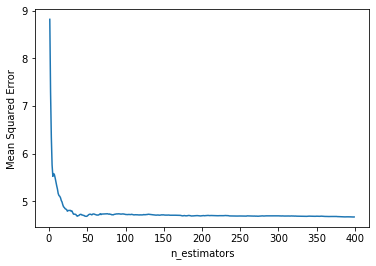

In [23]:
import matplotlib.pyplot as plt

plt.plot(dt_x['data'], dt_y['data'])
plt.xlabel(dt_x['name'])
plt.ylabel(dt_y['name'])
plt.show()

In [28]:
dt_output = [
    (dt_x['name'], dt_x['data']),
    (dt_y['name'], dt_y['data']) 
]

output = pd.DataFrame.from_items(dt_output)
output.head()

c:\users\visitor.slsi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  


,n_estimators,Mean Squared Error
0,1,8.820574
1,2,7.296352
2,3,6.349016
3,4,5.762485
4,5,5.523206


In [29]:
output.to_csv('randomforest_n_estimators_MSE.csv')